<a href="https://colab.research.google.com/github/VibhuRaj01/ML/blob/main/GoldPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download -d altruistdelhite04/gold-price-data

  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 34.0MB/s]


In [ ]:
!unzip '/content/gold-price-data.zip' -d /content

Archive:  /content/gold-price-data.zip
  inflating: /content/gld_price_data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/gld_price_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


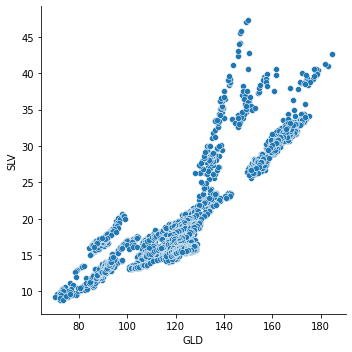

In [ ]:
sns.relplot(data=data, x="GLD", y="SLV", kind='scatter')

In [ ]:
X = data.drop(['Date', 'GLD'], axis = 1)
Y = data['GLD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 3)

In [ ]:
model=LinearRegression()
model.fit(X_train, Y_train)
prediction= model.predict(X_train)

In [ ]:
er=metrics.r2_score(Y_train, prediction)
print(er)

0.879461940900476


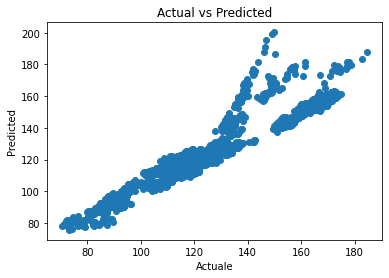

In [ ]:
plt.scatter(Y_train, prediction)
plt.xlabel("Actuale")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')
plt.show()